# Lecture 4: Visualization

## Outline for Lecture 3

* Announcements
* Recap from last time

    * Functions
    * Conditionals
    * Loops
* Plotting with Matplotlib
    * Plotting basics review and extension
        - plot()
            - can use lists or arrays
            - format strings ('b--', 'g^', etc.)
            - automatically creates a figure if one doesn't exist
                - otherwise makes new 'axes' on active figure
        - figure()
            - used to make new figure and make existing ones active
                - e.g., figure(2) creates Figure 2, or makes Figure 2 active if it already exists.
        - subplot() and add_subplot()
            - for making subplots and adding subplots to figures
            - basic example of working with axes objects
                - (important, because most gallery examples make plots by using methods of axes objects)
                - adding plots to them
                - drawing things on them
                - getting and setting limits
        - matplotlib documentation and gallery
        
(If there's enough time)

                
   

## Announcements

Workshop 1 has been graded. 

Homework02 and Workshop02 assignments are posted. Since next Monday is a holiday, Homework02 is due on Tuesday, Feb 20 @ 5pm PT. 

Feel free to use our channel in slack to ask any questions that you might have about the course, homework or workshops.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#from urllib.request import urlopen
#from PIL import Image

#url = 'https://www.freepnglogos.com/uploads/heart-png/red-shadow-heart-images-download-1.png'
#img = Image.open(urlopen(url))
#plt.imshow(img)

## Functions

A function is a self-contained named piece of code that can be used by other parts of the code. Functions usually take arguments (parameters, variables), and return a value. Trig functions are a standard example. Most languages allow you to define your own functions. Functions can be group into a library, usually according to functionality they provide (e.g. math, complex numbers, linear algebra, plotting, etc).

In a way, Python functions can be viewed mathematical functions:

$f: \mathbb{X} \rightarrow \mathbb{Y}$

where $\mathbb{X}$ and $\mathbb{Y}$ can be whichever space of your choice.

Python has 3 classes of functions:
-  built-in functions
-  functions from packages/modules
-  user-defined functions.

**Required and optional arguments**

Python functions can have two types of arguments: required and optional. Required arguments have no default value and must be passed by the user. Optional arguments have a default value which is used if not specified by the user.

In [35]:
def distance( x, y=0. ):
    print('x=',x,'y=',y)
    return abs(x-y)

In [41]:
x=17
print(distance(5,3))
print(distance(5))
print(x)

x= 5 y= 3
2
x= 5 y= 0.0
5.0
17


You can also pass variables into a function using `global` keyword. This feature came to us from Fortran and other pre-1970s languagues and is not a good practice. The issue is that the global variables may create side-effects: where these variables modify the results of the function without modifying the arguments, and vice versa -- the function may modify variables other than the return values. This breaks one of the tenets of the modern "object-oriented" programming -- encapsulation. This behavior has to be documented. 

In [43]:
x=10
theta=100

def FourVectorLength(x,y,z,t):
    global theta
    print('x inside the fcn = ',x)
    
    theta=10
    print('theta inside the fcn = ',theta)
    return np.sqrt(t**2-x**2-y**2-z**2)


print('x outside the fcn = ',x)
print('theta = ',theta)

x outside the fcn =  10
theta =  100


In [4]:
print('distance(1,2)=',distance(1,2))
print('distance(2)=',distance(2))
print('distance(y=11,x=7)=',distance(y=11,x=7))

x= 1 y= 2
distance(1,2)= 1
x= 2 y= 0.0
distance(2)= 2.0
x= 7 y= 11
distance(y=11,x=7)= 4


In [45]:
theta=100
length = FourVectorLength(t=10,x=-5,y=2,z=3)
print(length)

print('x is now = ',x)
print('theta is now = ',theta)

x inside the fcn =  -5
theta inside the fcn =  10
7.874007874011811
x is now =  10
theta is now =  10


## Conditionals

Conditionals are commands that are executed only if some condition is satisfied.
Beware! Indentation is important in Python. Note, that it doesn't really matter how broad the indentation is.

In [70]:
value = 0 # this line is not needed
x = float(input('Enter numerical value: '))
if x > 10 :
    value = -1
elif x > 7 : # else if
    value = 6
elif x > -1 :
    value = 1
else :
    value = 0
    
print (value)

value = 0
if x > 10:
    value = distance(5)
    
print(value)

Enter numerical value:  10


6


# Loops

Loops represent a piece of code that is executed repeatedly. That's what the computers are made for !

### While

The while loop repeats and execution while (as long as) a condition is valid.

In [95]:
sum = 0
count = 0

print('0123456789')

while sum < 99:
    sum += 10
    count += 1
    
    if count > 10:
        break

    print ('{0:2d},{1:3d},{2:6.2f}'.format(count,sum,sum**2))
    
print ('final sum = ', sum, 'after ',count,'iterations')

0123456789
 1, 10,100.00
 2, 20,400.00
 3, 30,900.00
 4, 40,1600.00
 5, 50,2500.00
 6, 60,3600.00
 7, 70,4900.00
 8, 80,6400.00
 9, 90,8100.00
10,100,10000.00
final sum =  100 after  10 iterations


**Special keywords: break, continue, pass, else**
These allow you to have additional control over your loops, e.g. to break out of them or to skip parts when certain conditions are met.

## For

The for loop is more conventional and repeats the execution for an index within a given range. This is similar to for() loop in C or other languages.

An equivalent syntax in C would be for(int i=0;i<10;i++)

In [68]:
l = range(10,20)
l2 = range(30,40)
print (len(l),type(l))
print(l)  

index = 0
for element in l:
#    print(element)
    prod=element*l2[index]
    print(prod)
    index+=1

print("\n")    
    
for index,element in enumerate(l[3:6],start=3):
#    prod = element*l2[index]
    print(index,element)


10 <class 'range'>
range(10, 20)
300
341
384
429
476
525
576
629
684
741


3 13
4 14
5 15


### Nesting and recursive functions

We have seen already a few examples of an if statement inside a while loop: this called nesting. Python sets no limit to nesting, i.e. you can have infinite statements and loops within each other.

In [69]:
def factorial(n):                # definition of the function
    value = 1
    for i in range(2,n+1):       # loop
        value *= i               # increment factorial 
        
    return value                 # return value

print ('factorial(10)=',factorial(10))
for i in range(1,5):
    print ('factorial(%d)=%2d' % (i,factorial(i)))

print(factorial(1.1))

factorial(10)= 3628800
factorial(1)= 1
factorial(2)= 2
factorial(3)= 6
factorial(4)=24


TypeError: 'float' object cannot be interpreted as an integer

Here is a more elegant way to implement the function (recursive). It also has basic error handling

In [17]:
import numpy as np

def factRecursive(n):
 
    if type(n)!=int:                     # these factorials defined only for integers
        return np.nan                    # return Not-a-number
    if n > 1:
        return n*factRecursive(n-1)      # THIS IS THE RECURSION!!
    elif n >= 0:
        return 1
    else:
        return -np.inf                 # return negative infinit

print (factRecursive(10))
print (factRecursive(-1))
print (factRecursive('Joe'))

x = factorial(5)   # old function still defined
y = x**2
print (y)

3628800
-inf
nan
14400


## Try-except clauses

Sometimes you just want to prevent run-time errors from stopping the execution of your code. This can be useful if you are running a very long program and do not want it to crash in the middle

In [71]:
n = 10

try:
    nf = factorial(n)
except:
    print("Error executing factorial(",n,")")
else:
    print("factorial(",n,") = ",nf)
finally:
    print("This is always executed")
    


factorial( 10 ) =  3628800
This is always executed


# Plotting

In this lecture, we will discuss how to visualize data in ways that help us interpret it, reach conclusions, and commumunicate our conclusions, messages, and interpretations effectively to our audience.


## Plotting with Matplotlib

**Introductory remark:** *In this notebook, the examples are all made with the Matplotlib package. However, you may choose whatever packages you are familiar with to make your plots (but no Excel please !). This said, our lecture emphasizes the basic rules of producing data visualization that are effective in communicating scientific results; no matter what technical solution you choose, you must be able to realize these conceptual requirements specified by our course.*



Matplotlib provides an interface, and a set of convenient tools for graphing (2-dimensional, i.e. a graph with 2 axes, as well as 3-dimensional). The interface and appearance of the plots are deliberately made to resemble Matlab. One could argue with this aesthetic choice, but the interface makes it much easier for users used to Matlab to transition to Python (and vice versa!)

We will go over only a few examples. Documentation and examples are available at https://matplotlib.org/ . In particular, my favorite -- examples: https://matplotlib.org/stable/gallery/index.html(make sure to cite in your code)

Let's look at an example

3.141592653589793


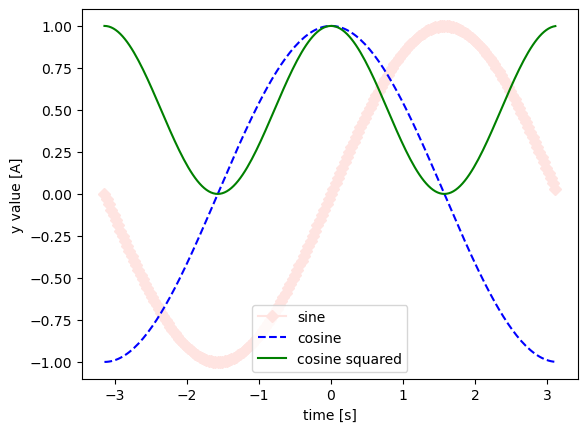

In [84]:
from pylab import * # import all functions from numpy and matplotlib. Beware ! Overloads functions like sqrt, sin
import numpy as np

# make plots inline (so that the plots appear). This is the default for datahub, but useful to keep for compatibility
%matplotlib inline
print(pi)
x = np.arange(-pi, pi, pi/100)   # create an array of x values
#print(x)
plot(x, sin(x), color = 'mistyrose', marker='D', label='sine' )   # plot sin(x) in a rose color
plot(x, cos(x), '--',color='blue', label='cosine' ) # plot cos(x) in a green, dashed line
plot(x, cos(x)**2, '-',color='green', label='cosine squared' ) # plot cos(x) in a green, dashed line
xlabel('time [s]' )
ylabel('y value [A]' )
#xlim(-pi/2, pi/2)
#ylim(-0.5, 0.5)
legend(loc='best')
show()

Actually, plot is a very flexible command. Arguments can any sequential data types (e.g. lists), although internally they are converted into arrays. Attributes can be set on the command line or separately (see below). 

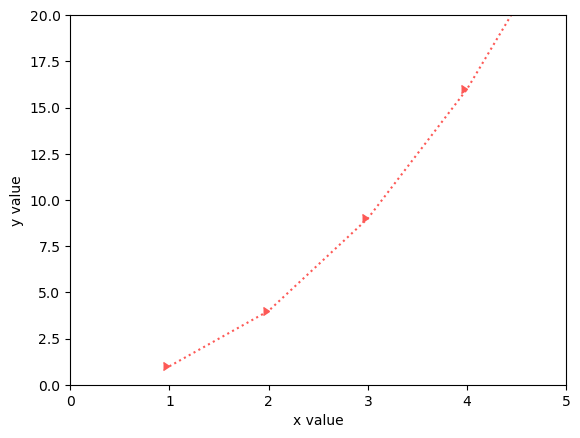

In [85]:
plot([1,2,3,4,5], [1,4,9,16,25],':',marker=5, color='xkcd:grapefruit')
axis([0, 5, 0, 20])
xlabel('x value' )
ylabel('y value' )
show()

### Line attributes

![Line styles](linestyles.png)

### Colors

Huge range of colors in python! Here is the full table, but you can also just start with the base colors: b, g, r, c, m, y, k, w


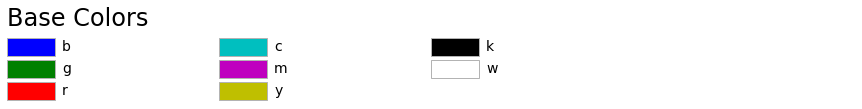

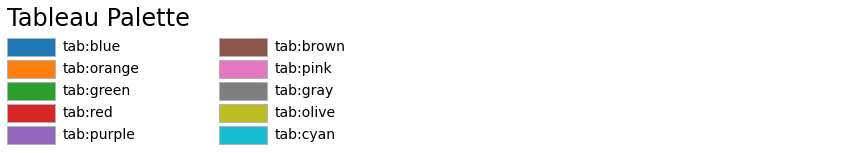

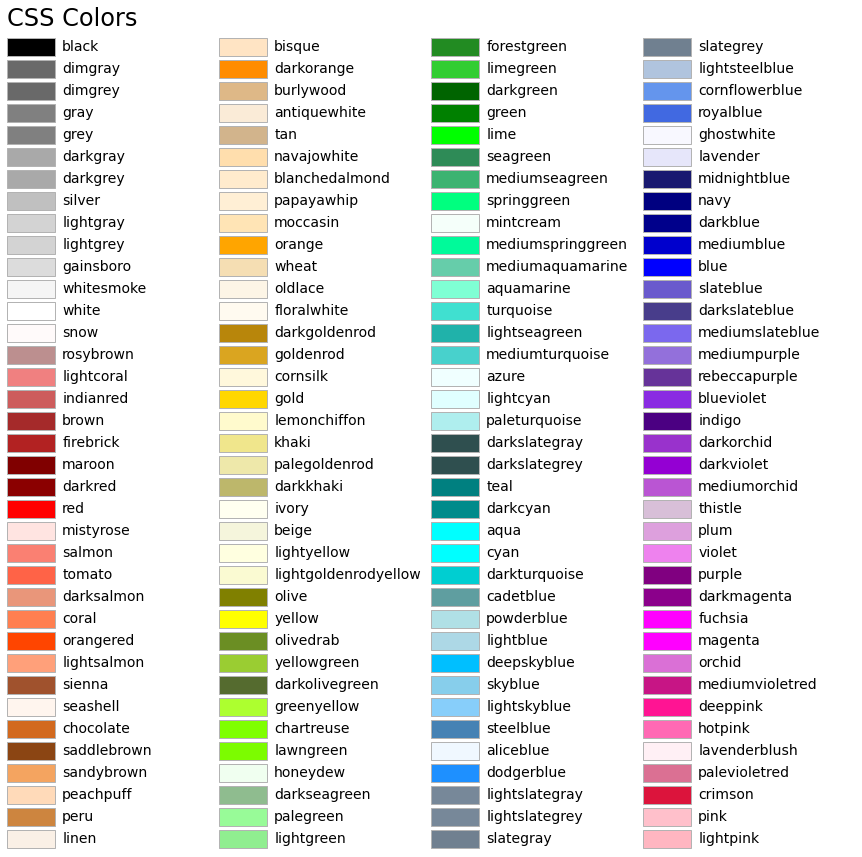

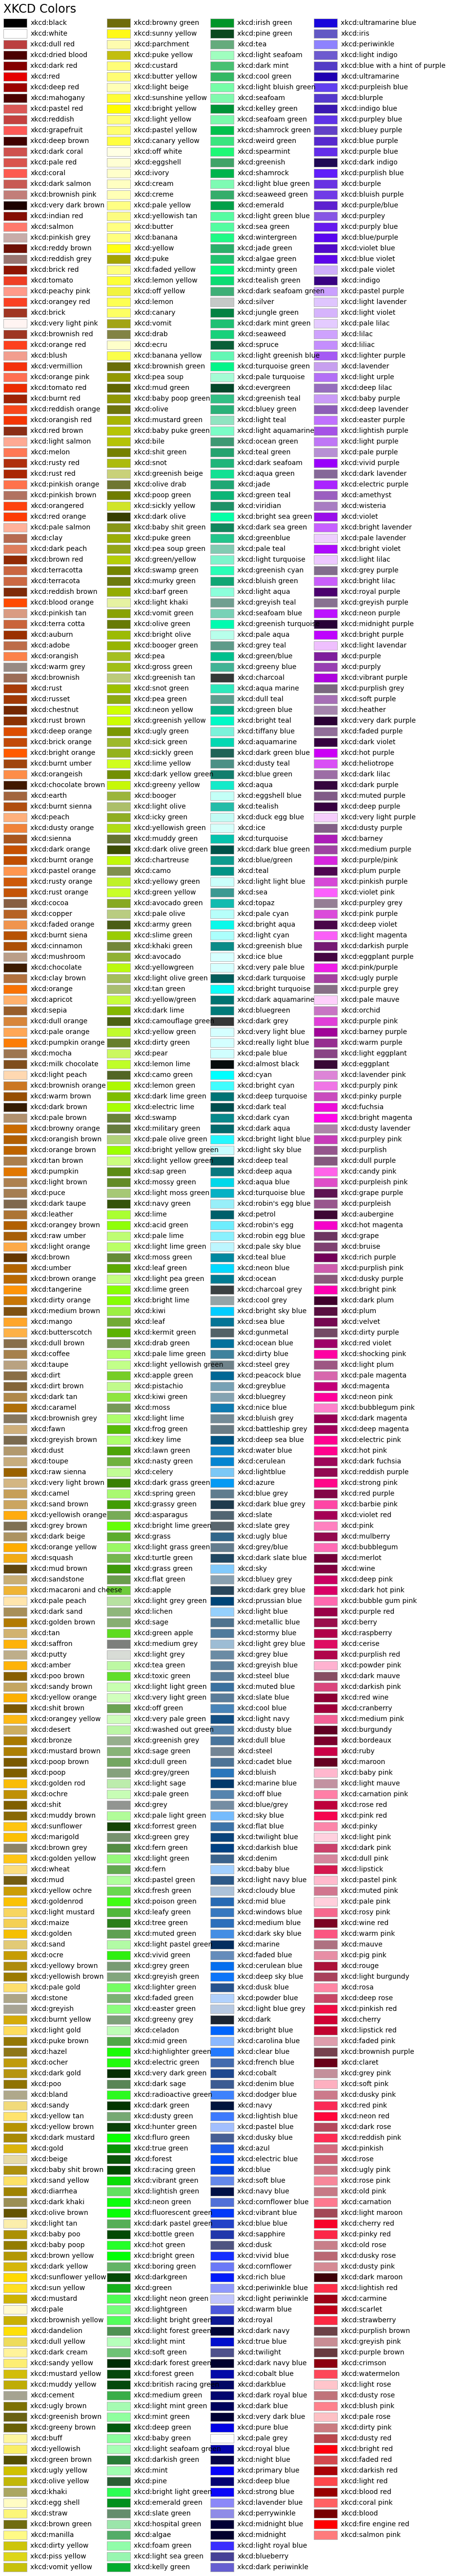

In [34]:
#Taken from: https://matplotlib.org/stable/gallery/color/named_colors.html

from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = colors

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

plot_colortable(mcolors.BASE_COLORS, "Base Colors",
                sort_colors=False, emptycols=1)
plot_colortable(mcolors.TABLEAU_COLORS, "Tableau Palette",
                sort_colors=False, emptycols=2)

plot_colortable(mcolors.CSS4_COLORS, "CSS Colors")

# Optionally plot the XKCD colors (Caution: will produce large figure)
xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")
xkcd_fig.savefig("XKCD_Colors.png")

plt.show()



### Markers

![Filled markers](filledmarkers.png)
![Unfilled markers](unfilledmarkers.png)

See (http://matplotlib.org/) for more details

### Plots and subplots

Subplots are very useful when you want to draw more than one plot at the same time. Let's start by drawing two plots in the same cell (but things will quickly get quite a bit more complicated!)

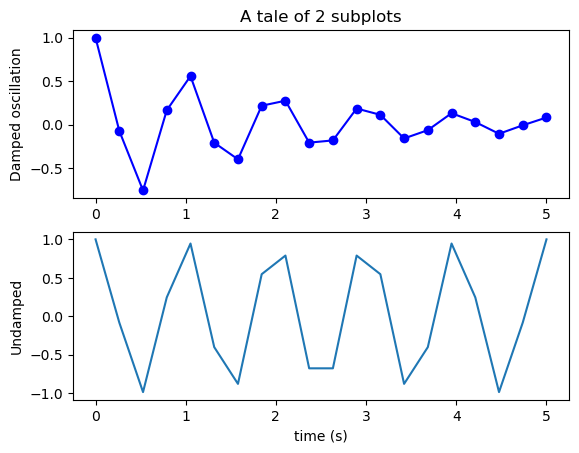

In [86]:
import numpy as np                 # notice import with named namespace: better practice 
import matplotlib.pyplot as plt    # notice import with named namespace: better practice 

x1 = np.linspace(0.0, 5.0, 20) #what happens if I don't specify the number of points
x2 = np.linspace(0.0, 5.0, 20)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1/2)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1) # subplot(nrows, ncols, index, **kwargs)
plt.plot(x1, y1, color='blue', marker='o')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, )
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

Now let's explore a few different ways to use subplots()

#### A figure and a single subplot

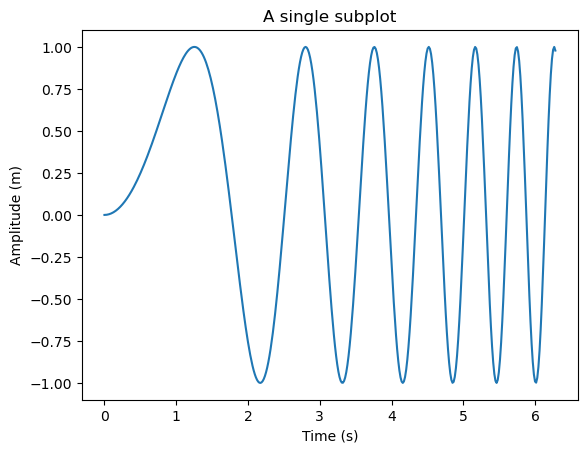

In [87]:
import matplotlib.pyplot as plt 
import numpy as np

# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# Just a figure and one subplot
f, ax = plt.subplots() #f is the figure; a is the axis
ax.plot(x, y)
ax.set_title('A single subplot')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude (m)')
plt.show()


#### Two subplots that share the x-axis

Text(0.5, 1.0, 'Sharing X axis')

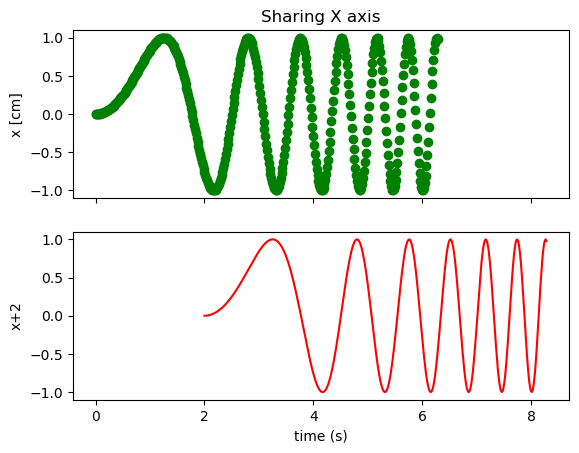

In [88]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].scatter(x, y, color='g')
axarr[1].plot(x+2, y,'r')

axarr[1].set_xlabel('time (s)')
axarr[0].set_ylabel('x [cm]')
axarr[1].set_ylabel('x+2')
axarr[0].set_title('Sharing X axis')


#### Two subplots that share the y-axis

Text(0.5, 0, 'time (s)')

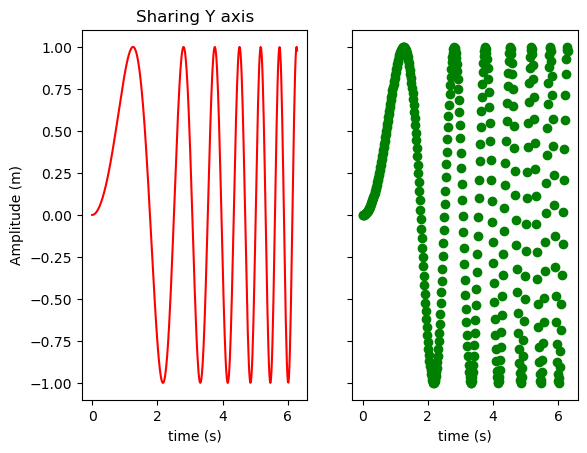

In [28]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y, 'r')
ax1.set_title('Sharing Y axis')
ax1.set_ylabel('Amplitude (m)')
ax1.set_xlabel('time (s)')
ax2.scatter(x, y, color='g')
ax2.set_xlabel('time (s)')

#### Three subplots sharing both x/y axes

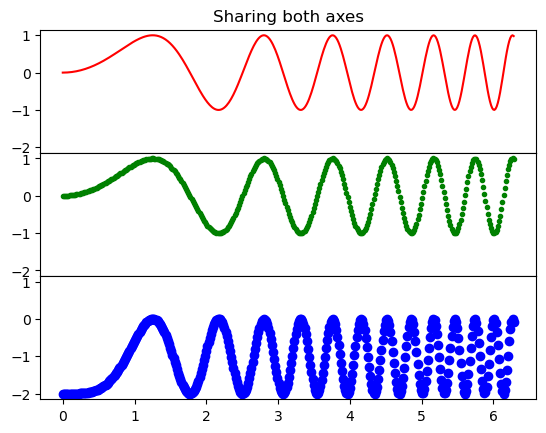

In [29]:
f, (ax1, ax2, ax3) = plt.subplots(3,sharex=True,sharey=True)
ax1.plot(x, y, 'r')
ax1.set_title('Sharing both axes')
ax2.scatter(x, y, marker='.', color='g')
ax3.scatter(x, 2 * y ** 2 - 2, color='b')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
foo = plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)


#### Four subplots; sharing x and y axes in each row

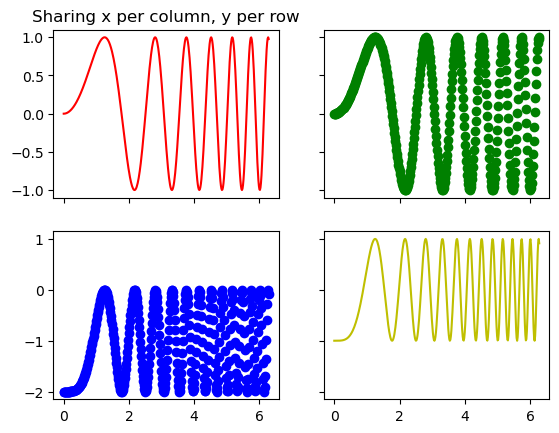

In [30]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, y, 'r')
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y, color='g')
ax3.scatter(x, 2 * y ** 2 - 2, color='b')
ax4.plot(x, 2 * y ** 2 - 1, 'y')


For (even more!) details see the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)

### Histogramming 

Histograms are different to graphs because they store the data in bins. Histograms are used extensively in data analysis. We'll see them again in the lecture on statistics.

[191.65591654 172.35590449 224.76032916 ... 209.80512923 195.16369995
 150.2380046 ]


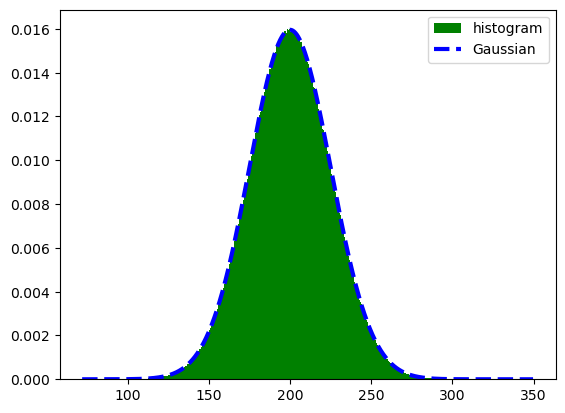

In [93]:
from pylab import *
from scipy.stats import norm # a new libary -- more advanced scientific programming

mu = 200
sigma = 25
x = mu + sigma*randn(10000000)
print(x)


val, bins, patches = plt.hist(x, 1000, density=True, color='g', label='histogram')

#print(bins)
lines = plot(bins, norm.pdf(bins, mu, sigma), 'b--',  linewidth=3, label='Gaussian')
legend(loc = 'best')

Now let's have a look at what the different histtype settings do.

[106.07014857 115.48029737 124.89044616 134.30059496 143.71074375
 153.12089255 162.53104135 171.94119014 181.35133894 190.76148773
 200.17163653 209.58178533 218.99193412 228.40208292 237.81223171
 247.22238051 256.63252931 266.0426781  275.4528269  284.86297569
 294.27312449]


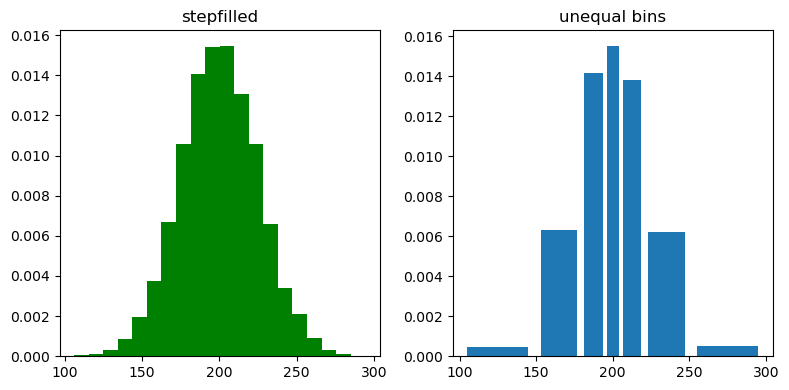

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# construct a histogram based on a Gaussian with mu=200 and sigma=25
mu = 200
sigma = 25
x = mu + sigma*np.random.randn(10000)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4)) # first the width, then the height

val, bins, patches = ax0.hist(x, 20, density=1, histtype='stepfilled', facecolor='g') #stepfilled is the default
ax0.set_title('stepfilled')
print(bins)

# Create a histogram by providing the bin edges (unequally spaced).
bins = [100, 150, 180, 195, 205, 220, 250, 300]
ax1.hist(x, bins, density=1, histtype='bar', rwidth=0.8)
ax1.set_title('unequal bins')

plt.tight_layout()
plt.show()

### For fun: 3d plotting

Does anyone know what this function is?

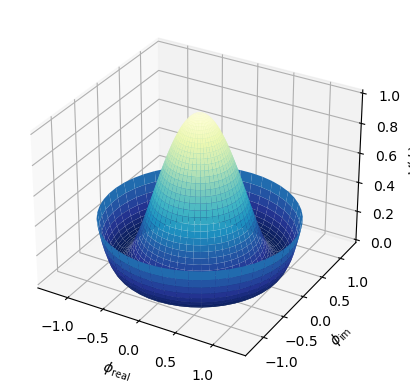

In [33]:
# By Armin Moser

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
step = 0.04
maxval = 1.0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create supporting points in polar coordinates
r = np.linspace(0,1.25,50)
p = np.linspace(0,2*np.pi,50)
R,P = np.meshgrid(r,p)
# transform them to cartesian system
X,Y = R*np.cos(P),R*np.sin(P)

Z = ((R**2 - 1)**2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.YlGnBu_r)
ax.set_zlim3d(0, 1)
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')
plt.show()

### More information
We will cover plotting in the workshops. In the meantime, matplotlib is extensively documented:
http://matplotlib.org/
In particular, click on "Gallery" and "Examples" -- that's where a lot of this code has come from

### Cheatsheet

Convenient PDF cheatsheet summarizing what we've discussed and more: 

![Cheatsheet](Cheatsheet.png)

You'll want the PDF to get to high resolution, which is available in the files on bcourses and in datahub.